# Bay Wheels System Data Analysis
## by Carlos Carcamo

## Preliminary Wrangling

> [Bay Wheels](https://www.lyft.com/bikes/bay-wheels) is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially re-launched as Ford GoBike in a partnership with Ford Motor Company.
<br><br>
The dataset used for this exploratory analysis consists of monthly individual trip data from **January 2019** to **December 2019.** Visualizations below are created from wrangled and cleaned data to facilitate exploration analysis and help discover usage pattern and rider characteristics. If you need to extract the whole data for Bay Wheels System, you can get it [here.](https://s3.amazonaws.com/baywheels-data/index.html)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Gathering Data
In the project folder, I have placed the 12 files for each month of 2019 with bike trips data. As all the files have the same structure I will gather all of them into one and only file for entire 2019:

In [13]:
#Check data
df_01 = pd.read_csv('201901-fordgobike-tripdata.csv') #first month file
df_01.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
192077,390,2019-01-01 00:16:36.8450,2019-01-01 00:23:07.2530,109.0,17th St at Valencia St,37.763316,-122.421904,141.0,Valencia St at Cesar Chavez St,37.747998,-122.420219,5059,Subscriber,No
192078,227,2019-01-01 00:17:40.9750,2019-01-01 00:21:28.4180,73.0,Pierce St at Haight St,37.771793,-122.433708,96.0,Dolores St at 15th St,37.766210,-122.426614,4659,Subscriber,No
192079,565,2019-01-01 00:11:03.4410,2019-01-01 00:20:29.2680,269.0,Telegraph Ave at Carleton St,37.862320,-122.258801,243.0,Bancroft Way at College Ave,37.869360,-122.254337,4783,Subscriber,Yes
192080,182,2019-01-01 00:09:56.2110,2019-01-01 00:12:58.7480,269.0,Telegraph Ave at Carleton St,37.862320,-122.258801,240.0,Haste St at Telegraph Ave,37.866043,-122.258804,4621,Subscriber,Yes
192081,226,2019-01-01 00:07:10.5760,2019-01-01 00:10:57.1960,245.0,Downtown Berkeley BART,37.870139,-122.268422,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,5117,Customer,No


In [22]:
df_2019 = df_01
rows = df_01.shape[0]
print(rows)
for i in range(2,13):
    file = '2019'
    #Get number of month, as is shown on file name
    if i < 10:
        file = file + '0' + str(i)
    else:
        file = file + str(i)
    #There was a change on file names en May
    if i < 5 :
        file = file + '-fordgobike-tripdata.csv'
    else:
        file = file + '-baywheels-tripdata.csv'
    #Create dataframe
    df = pd.read_csv(file)
    print('file ' + str(i) + ': ' + str(df.shape[0]))
    #Update caoun of rows, just for control
    rows = rows + df.shape[0]
    #Append monthly df with yearly df
    df_2019 = df_2019.append(df,ignore_index=True)
print(rows, df_2019.shape[0])        

192082
file 2: 183412
file 3: 256299
file 4: 239111
file 5: 182163
file 6: 191772
file 7: 258102
file 8: 210563
file 9: 217986
file 10: 239895
file 11: 185496
file 12: 150102
2506983 2506983


Before continue with the Wrangling Process, I will store my new dataset on a new file:

In [24]:
df_2019.to_csv('2019-baywheels-tripdata.csv',index=False)

Now, with the unified file, I will proceed with Assesment and Cleaning.

### Assessing Data

I will make some checks on my annual dataframe to find inconsistencies or issues. At the end of this section, you will find the summary of all the quality and tidiness issues found.

In [27]:
#Quick view of data
df_2019.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
985065,1324,2019-05-11 14:17:28.8680,2019-05-11 14:39:33.1450,10.0,Washington St at Kearny St,37.795393,-122.404770,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,1416,Customer,No,NaN
826853,285,2019-04-05 13:33:35.5210,2019-04-05 13:38:20.5700,86.0,Market St at Dolores St,37.769305,-122.426826,119.0,18th St at Noe St,37.761047,-122.432642,5550,Subscriber,No,NaN
2109522,417,2019-10-08 18:32:08.8850,2019-10-08 18:39:06.0800,109.0,17th St at Valencia St,37.763316,-122.421904,381.0,20th St at Dolores St,37.758238,-122.426094,12001,Subscriber,No,NaN
1226725,347,2019-06-03 20:09:28.9440,2019-06-03 20:15:16.3550,37.0,2nd St at Folsom St,37.785377,-122.396906,81.0,Berry St at 4th St,37.775880,-122.393170,2039,Subscriber,No,NaN
936469,205,2019-05-21 06:52:01.9790,2019-05-21 06:55:27.1350,131.0,22nd St at Dolores St,37.755000,-122.425728,386.0,24th St at Bartlett St,37.752105,-122.419724,3129,Subscriber,No,NaN
234132,788,2019-02-22 17:49:25.4970,2019-02-22 18:02:33.5960,81.0,Berry St at 4th St,37.775880,-122.393170,355.0,23rd St at Tennessee St,37.755367,-122.388795,6533,Customer,No,NaN
1299113,1655,2019-07-21 16:26:31.4920,2019-07-21 16:54:06.9190,64.0,5th St at Brannan St,37.776754,-122.399018,381.0,20th St at Dolores St,37.758238,-122.426094,2901,Customer,No,NaN
2277674,684,2019-11-12 10:47:37.2490,2019-11-12 10:59:01.6020,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,2800,Subscriber,No,NaN
2151087,564,2019-10-03 09:06:11.9260,2019-10-03 09:15:36.5720,89.0,Division St at Potrero Ave,37.769218,-122.407646,81.0,Berry St at 4th St,37.775880,-122.393170,11796,Subscriber,No,NaN
241892,145,2019-02-21 20:31:21.8180,2019-02-21 20:33:47.8130,243.0,Bancroft Way at College Ave,37.869360,-122.254337,253.0,Haste St at College Ave,37.866418,-122.253799,1426,Subscriber,Yes,NaN


In [26]:
#Get general info
df_2019.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             2506983 non-null  int64  
 1   start_time               2506983 non-null  object 
 2   end_time                 2506983 non-null  object 
 3   start_station_id         2426249 non-null  float64
 4   start_station_name       2426850 non-null  object 
 5   start_station_latitude   2506983 non-null  float64
 6   start_station_longitude  2506983 non-null  float64
 7   end_station_id           2424081 non-null  float64
 8   end_station_name         2424633 non-null  object 
 9   end_station_latitude     2506983 non-null  float64
 10  end_station_longitude    2506983 non-null  float64
 11  bike_id                  2506983 non-null  int64  
 12  user_type                2506983 non-null  object 
 13  bike_share_for_all_trip  2263724 non-null 

In [29]:
#Check for total null values
df_2019.isna().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80734
start_station_name           80133
start_station_latitude           0
start_station_longitude          0
end_station_id               82902
end_station_name             82350
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       2386145
dtype: int64

In [30]:
#Check values for rental_access_method
df_2019.rental_access_method.value_counts()

app        108010
clipper     12828
Name: rental_access_method, dtype: int64

In [31]:
#Check values for bike_share_for_all_trip
df_2019.bike_share_for_all_trip.value_counts()

No     2086152
Yes     177572
Name: bike_share_for_all_trip, dtype: int64

In [33]:
#Check values for start_station_id
df_2019.start_station_id.value_counts()

58.0     45058
81.0     42962
30.0     40302
15.0     39016
67.0     36576
         ...  
429.0        4
329.0        3
444.0        3
484.0        2
420.0        1
Name: start_station_id, Length: 436, dtype: int64

In [32]:
#Check for duplicates
df_2019.duplicated().sum()

0

In [34]:
#Check values for user_type
df_2019.user_type.value_counts()

Subscriber    2021166
Customer       485817
Name: user_type, dtype: int64

#### Assessment Documentation

##### Quality Issues
- Drop columns that won't be used for analysis
- Delete columns with null Start and End Stations
- Change ID's columns to object type
- Change date columns to datetime type

##### Tidiness Issues
- Split Start dates into Day of Week, Month and Hour columns
- Create a column with value = 1 to represent the number of trips per row. This will be used just to keep summarized easily the number of trips, to compare it agains other variables

### Cleaning Data

Before estart with exploratory analysis, I will perform some changes on dataset to get it ready. Let's create a copy of dataset:

In [326]:
df_2019_clean = df_2019.copy()

#### Quality Issues
- Drop columns that won't be used for analysis: Drop ``bike_id``, ``bike_share_for_all_trip`` and ``rental_access_method``

In [327]:
#CODE
df_2019_clean.drop(['bike_id','bike_share_for_all_trip','rental_access_method'], axis=1, inplace=True)
#TEST
df_2019_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 12 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             2506983 non-null  int64  
 1   start_time               2506983 non-null  object 
 2   end_time                 2506983 non-null  object 
 3   start_station_id         2426249 non-null  float64
 4   start_station_name       2426850 non-null  object 
 5   start_station_latitude   2506983 non-null  float64
 6   start_station_longitude  2506983 non-null  float64
 7   end_station_id           2424081 non-null  float64
 8   end_station_name         2424633 non-null  object 
 9   end_station_latitude     2506983 non-null  float64
 10  end_station_longitude    2506983 non-null  float64
 11  user_type                2506983 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 229.5+ MB


- Delete columns with null Start and End Stations: Drop rows with null values

In [328]:
#CODE
df_2019_clean.drop(df_2019_clean[df_2019_clean['start_station_id'].isnull()].index, inplace = True)
#TEST
df_2019_clean.isna().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id               0
start_station_name             0
start_station_latitude         0
start_station_longitude        0
end_station_id             18990
end_station_name           18685
end_station_latitude           0
end_station_longitude          0
user_type                      0
dtype: int64

In [329]:
#CODE
df_2019_clean.drop(df_2019_clean[df_2019_clean['end_station_id'].isnull()].index, inplace = True)
#TEST
df_2019_clean.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
user_type                  0
dtype: int64

In [93]:
#TEST
df_2019_clean.shape

(2407259, 13)

- Change ID's columns to object type: Covert columns ``start_station_id`` and ``end_station_id``  to string

In [331]:
#CODE
df_2019_clean['start_station_id'] = df_2019_clean['start_station_id'].astype(np.object)
df_2019_clean['end_station_id'] = df_2019_clean['end_station_id'].astype(np.object)
#TEST
df_2019_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407259 entries, 0 to 2506660
Data columns (total 12 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             2407259 non-null  int64  
 1   start_time               2407259 non-null  object 
 2   end_time                 2407259 non-null  object 
 3   start_station_id         2407259 non-null  object 
 4   start_station_name       2407259 non-null  object 
 5   start_station_latitude   2407259 non-null  float64
 6   start_station_longitude  2407259 non-null  float64
 7   end_station_id           2407259 non-null  object 
 8   end_station_name         2407259 non-null  object 
 9   end_station_latitude     2407259 non-null  float64
 10  end_station_longitude    2407259 non-null  float64
 11  user_type                2407259 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 238.8+ MB


- Change date columns to datetime type: Convert ``start_time`` and ``end_time`` columns to datetime type

In [332]:
#CODE
df_2019_clean['start_time'] = df_2019_clean['start_time'].astype('datetime64[ns]')
df_2019_clean['end_time'] = df_2019_clean['end_time'].astype('datetime64[ns]')
#TEST
df_2019_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407259 entries, 0 to 2506660
Data columns (total 12 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             2407259 non-null  int64         
 1   start_time               2407259 non-null  datetime64[ns]
 2   end_time                 2407259 non-null  datetime64[ns]
 3   start_station_id         2407259 non-null  object        
 4   start_station_name       2407259 non-null  object        
 5   start_station_latitude   2407259 non-null  float64       
 6   start_station_longitude  2407259 non-null  float64       
 7   end_station_id           2407259 non-null  object        
 8   end_station_name         2407259 non-null  object        
 9   end_station_latitude     2407259 non-null  float64       
 10  end_station_longitude    2407259 non-null  float64       
 11  user_type                2407259 non-null  object        
dtype

#### Tidiness Issues
- Split Start dates into Day of Week, Month and Hour columns: Create 2 new colums from ``start_time`` to store the Day of Week and the Hour

In [333]:
#CODE
df_2019_clean['start_time_dayofweek'] = df_2019_clean['start_time'].dt.strftime('%A')
df_2019_clean['start_time_month_name'] = df_2019_clean['start_time'].dt.strftime('%B')
df_2019_clean['start_time_hour'] = df_2019_clean['start_time'].dt.hour
#TEST
df_2019_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407259 entries, 0 to 2506660
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             2407259 non-null  int64         
 1   start_time               2407259 non-null  datetime64[ns]
 2   end_time                 2407259 non-null  datetime64[ns]
 3   start_station_id         2407259 non-null  object        
 4   start_station_name       2407259 non-null  object        
 5   start_station_latitude   2407259 non-null  float64       
 6   start_station_longitude  2407259 non-null  float64       
 7   end_station_id           2407259 non-null  object        
 8   end_station_name         2407259 non-null  object        
 9   end_station_latitude     2407259 non-null  float64       
 10  end_station_longitude    2407259 non-null  float64       
 11  user_type                2407259 non-null  object        
 12  

- Create a column with value = 1 to represent the number of trips per row: Create a column with value 1

In [334]:
#CODE
df_2019_clean['trips'] = 1
#TEST
df_2019_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407259 entries, 0 to 2506660
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             2407259 non-null  int64         
 1   start_time               2407259 non-null  datetime64[ns]
 2   end_time                 2407259 non-null  datetime64[ns]
 3   start_station_id         2407259 non-null  object        
 4   start_station_name       2407259 non-null  object        
 5   start_station_latitude   2407259 non-null  float64       
 6   start_station_longitude  2407259 non-null  float64       
 7   end_station_id           2407259 non-null  object        
 8   end_station_name         2407259 non-null  object        
 9   end_station_latitude     2407259 non-null  float64       
 10  end_station_longitude    2407259 non-null  float64       
 11  user_type                2407259 non-null  object        
 12  

In [335]:
#TEST
df_2019_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,start_time_dayofweek,start_time_month_name,start_time_hour,trips
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196,Grand Ave at Perkins St,37.808894,-122.256460,Subscriber,Thursday,January,17,1
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,134,Valencia St at 24th St,37.752428,-122.420628,Subscriber,Thursday,January,20,1
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245,Downtown Berkeley BART,37.870139,-122.268422,157,65th St at Hollis St,37.846784,-122.291376,Customer,Thursday,January,18,1
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85,Church St at Duboce Ave,37.770083,-122.429156,53,Grove St at Divisadero,37.775946,-122.437777,Customer,Thursday,January,19,1
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16,Steuart St at Market St,37.794130,-122.394430,28,The Embarcadero at Bryant St,37.787168,-122.388098,Customer,Thursday,January,14,1


Great! Now I will save the wrangled dataset into a file, to use it in the presentation notebook:

In [336]:
df_2019_clean.to_csv('2019-baywheels-tripdata-wrangled.csv',index=False)

In [337]:
#Get total rows and columns
df_2019_clean.shape

(2407259, 16)

From this point and beyond, I will name my dataset af ``df`` just for simplicity:

In [338]:
#Get total rows and columns
df = df_2019_clean
df.shape

(2407259, 16)

### What is the structure of your dataset?

> The dataset has more than 2 Million bike rides that happened in 2019 in the San Francisco Bay Area. The dataset contained features about:
<br>
- **Trip duration:** How long the trip was in seconds
- **Start time/end time:** Start/end datetime for the bike rides.
- **Stations:** start/end station, name and geolocation (latitude/longitude)
- **User type:** If the bike rider has a subscription or just a casual client
- **Day of week:** Which day the bike was rented
- **Month:** Which month the bike was rented
- **Hour:** What hour of the day the bike was rented
- **Trips:** A dummy metric with value = 1, just to represent that each row is a bike trip, and use the metric for summarization purposes

### What is/are the main feature(s) of interest in your dataset?

> - Trips 
- Trip duration

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> - Hours
- Days of Week
- Month
- User Type
- Stations

## Univariate Exploration

Let's start analysing the variables on dataset:

#### Trip duration

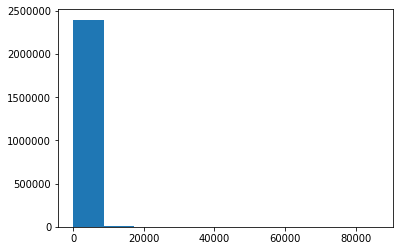

In [104]:
#Plot the chart
plt.hist(df.duration_sec);

Ok, the first plot isn't make sense... Let's try with more bins:

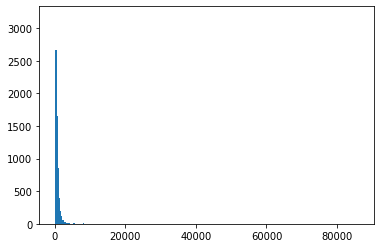

In [106]:
#Define bins
bin_edges = np.arange(0, df.duration_sec.max()+1, 1)
#Plot the chart
plt.hist(data = df, x = 'duration_sec', bins = bin_edges);

In [107]:
df.duration_sec.describe()

count    2.407259e+06
mean     8.048171e+02
std      1.910718e+03
min      6.000000e+01
25%      3.580000e+02
50%      5.690000e+02
75%      8.830000e+02
max      8.623000e+04
Name: duration_sec, dtype: float64

The visualization isn't clear yet, so, it will be necesary to discover how the distribution in duration is. Let's scale and transform it:

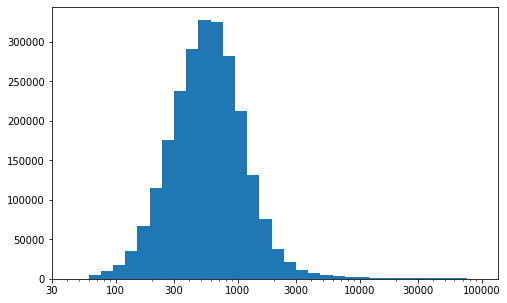

In [116]:
#Define bins for log scale
bin_edges = 10 ** np.arange(np.log10(df.duration_sec.min()), np.log10(df.duration_sec.max()) + 0.1, 0.1)
#Define ticks to show on chart
ticks = [30,100,300,1000,3000,10000,30000,100000]
#Plot the chart
plt.figure(figsize=[8, 5]);
plt.hist(data = df, x ='duration_sec', bins = bin_edges);
plt.xscale("log");
plt.xticks(ticks,ticks);

This is much better. This chart is telling us that users spend around 300 and 1000 seconds per trip, this is like between 5 and 17 mins per trip. Let's add the mean duration in the chart:

Trip Duration mean:  804.8171227109339 segs -> 13.413618711848898 mins


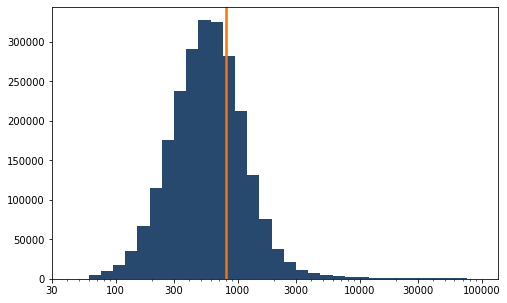

In [131]:
#Get mean duration
mean_duration = df.duration_sec.mean()
print('Trip Duration mean: ',mean_duration,'segs ->', mean_duration/60, 'mins')

#Plot the chart
plt.figure(figsize=[8, 5]);
plt.hist(data = df, x ='duration_sec', bins = bin_edges, color='#27496d');
plt.xscale("log");
plt.xticks(ticks,ticks);
plt.axvline(mean_duration, color = '#f97306', lw=2.5);

This looks much better now! In average, durations times are used to be shorts. This can be useful to generate revenue, Bat Wheels can show this as a solution for public transportation. Traffic jam can take you 45 mins in your car... as a bike cake take you in 15 minutes to your office! 

This view let's on clear that the we have some outliers on our data. The max duration for a trip was a trip for 86,230 segs (almost 24 hours!). Accordingly to [pricing information from Bay Wheels,](https://www.lyft.com/bikes/bay-wheels/pricing) there is no limit of how much time you can take a bike, as there are some rates for pay every 15 minutes. But, the most tipically scenario is that you return the bike after 30 (for casual customers) or 45 (for subscriptors) minutes after you grab it.

In [174]:
print(df.query('duration_sec>2700').shape[0]/df.shape[0])
print(df.query('duration_sec<=2700').duration_sec.mean())

0.019092669297321143
666.8001501716429


Almost 2% of the trips were large trips! Greater than 45 minutes. These 2% represents more than 218,000 trips. Let's take a look of the data for them:

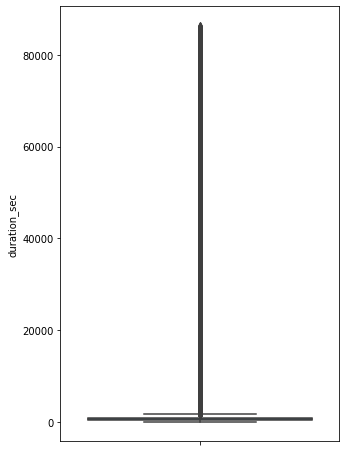

In [225]:
plt.figure(figsize=[5, 8]);
#Plot the chart
sb.boxplot(data = df,  y = 'duration_sec');

Well it seems that there are a lot of outliers, accordinly to IQR range distance. To have a better distribution of this, lets drop all outliers for this rule.

In [219]:
#Calculate fisrt quartile value
q1 = df.duration_sec.quantile(0.25)
#Calculate third quartile value
q3 = df.duration_sec.quantile(0.75)
#Calculate IQR value
iqr = q3 - q1
#Calculate outlier limit
outliers_lim = iqr * 1.5 + q3
outliers_lim

1670.5

1670.5 segs are the same as 27.8 minutes. This is less than the time allowed by Bay Wheels to keep the bike. Let's see if the chart improves just avoiding trips greater than 45 minutes:

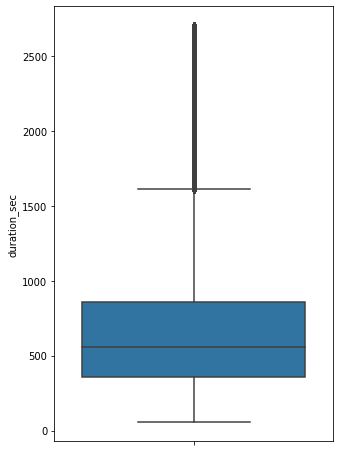

In [339]:
#Get trips greater than 45mins
df_45m = df.query('duration_sec<=2700')
#Plot the chart
plt.figure(figsize=[5, 8]);
sb.boxplot(data = df_45m,  y = 'duration_sec');

It's definitely much better. So let's drop registers greater than 45 minutes (2700segs), and use it for the rest of the analysis. Now the mean trip duration is a little bit smaller.

Trip Duration mean:  666.8001501716429 segs -> 11.113335836194048 mins


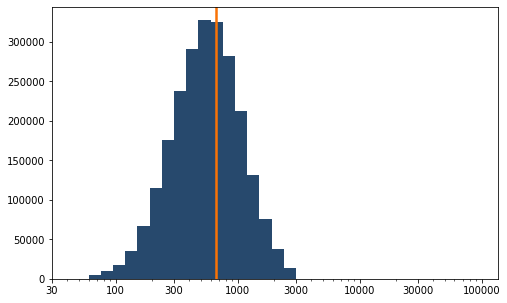

In [340]:
df = df_45m

#Get mean duration again
mean_duration = df.duration_sec.mean()
print('Trip Duration mean: ',mean_duration,'segs ->', mean_duration/60, 'mins')

#Plot the chart
plt.figure(figsize=[8, 5]);
plt.hist(data = df, x ='duration_sec', bins = bin_edges, color='#27496d');
plt.xscale("log");
plt.xticks(ticks,ticks);
plt.axvline(mean_duration, color = '#f97306', lw=2.5);

#### Day of Week

Now, it's time to discover how data is distributed by Day of Week. Do weekends have more trips than weekdays? Let's see:

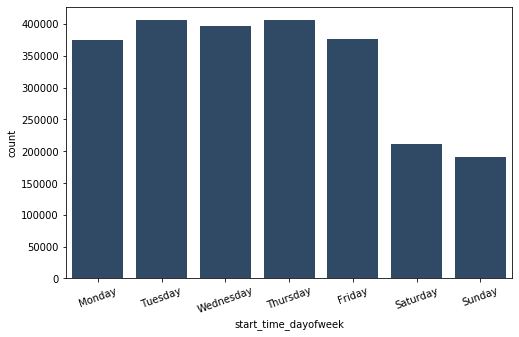

In [227]:
#Get days of week in their correct order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday' , 'Saturday', 'Sunday']
#Plot the chart
plt.figure(figsize=[8, 5]);
sb.countplot(data = df, x = 'start_time_dayofweek', color='#27496d', order = days_order);
plt.xticks(rotation=20);

What a nice surprise! This just prove my theory that people use bikes to go their works. This theory will take more weight with the next exploration.

#### Hour

Let's discover what is the rush hour for Bay Wheels:

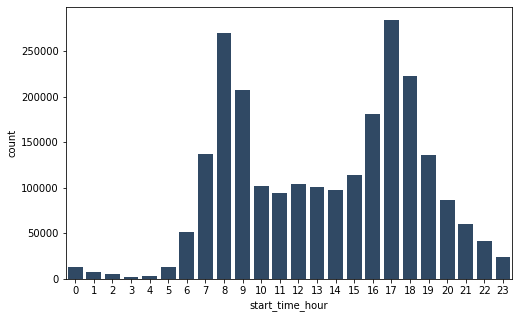

In [228]:
#Plot the chart
plt.figure(figsize=[8, 5]);
sb.countplot(data = df, x = 'start_time_hour', color='#27496d');

This analysis is takin form. San Francisco's people is moving to their jobs in bike! The chart shows that there are 2 rush hours for the start of a trip. The first one is around 8am, the second one is around 5pm. Those hours make sense to  the hour of start and finish for a work journal. It's also interesting to see that we have activity for less concurrency hours, that means that Bay Wheels give a 24 hours service, which could be a great for a slogan like "Every time you need it, you get it!"

#### User Type

Before finish the univariable part, let's take a look for distribution of user types of the service:

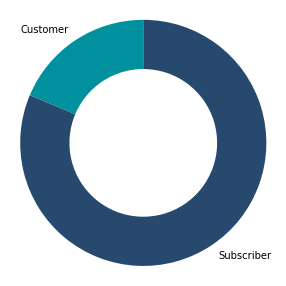

In [229]:
#Get the pieces values
pieces = df.user_type.value_counts()
#Define palette
colors = ['#27496d','#00909e']
#Plot the chart
plt.figure(figsize=[8, 5]);
plt.pie(pieces, labels = pieces.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.4}, colors = colors);
plt.axis('square');

Subscribers use the service more than casual users. And this have sense. The [pricing](https://www.lyft.com/bikes/bay-wheels/pricing) for the service is really afordable. If people use the service to go their works, getting a subscription could be a great option to save money, save time, and save the world!

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Distributions for Trips Durations resulted to be normal distributed between 100 and 3000 seconds with a log scale. I found some outliers for trips higher than 45 minutes, so I decided to drop them before to continue with the rest of the analysis.
<br>
A change to make in the dataset that I found, is about the Day of Week and Month. It could be better to transform this into a categorical column, to preserve the order of the days and months in every chart htat use this variable.

In [252]:
#Transform Days of Week into a Category
cat_dtype = pd.api.types.CategoricalDtype(categories=days_order, ordered=True)
df['start_time_dayofweek'] = df['start_time_dayofweek'].astype(cat_dtype)

#Transfom Months into a Category
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
cat_dtype = pd.api.types.CategoricalDtype(categories=months, ordered=True)
df['start_time_month_name'] = df['start_time_month_name'].astype(cat_dtype)

C:\Users\Carcac01\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Carcac01\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Nothing unusual at the moment.

## Bivariate Exploration

It's time to compare variables. After the Univariate explorations, I could see that people maybe use the Bay Wheels service as a transportation to their works. I will try to reinforce this idea so, let's start with bivariations.

#### Day of Week vs Hour

In te prior section, we discovered that weekdays have more activity that weekends. This reinforce my idea of people use the service to get to their works. So, let's see on which part of the day the service is more demanded by day:

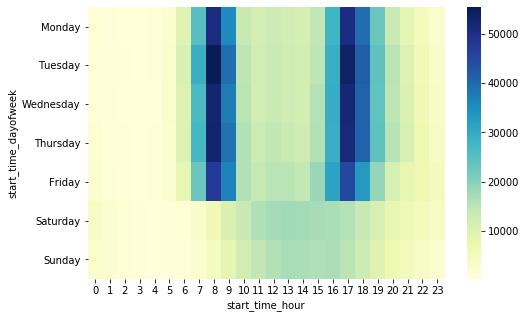

In [235]:
#Get trip by Day and Hour
ct_counts = df.groupby(['start_time_dayofweek', 'start_time_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'start_time_dayofweek', columns = 'start_time_hour', values = 'count')

#Plot the chart
plt.figure(figsize=[8, 5]);
sb.heatmap(ct_counts, cmap='YlGnBu');

Alright! The chart shows perfectly the relation between Day of Week and Hour. In previous lesson, we discovered that 8am and 5pm are the rush hours for the bikes rent. This tendency stays for all the weekdays. This demostrate that San Franciscans prefer use Bay Wheels to go to work. Actually, for weekends we see that the greater concentration of trips is between 11am and 5pm. This is probably for leisure purposes.

#### Day of Week vs User Type

Now, let's see distribution of subscribers and casual customers against days

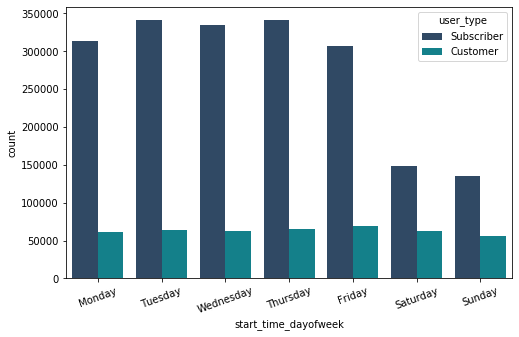

In [236]:
#Plot the chart
plt.figure(figsize=[8, 5]);
sb.countplot(data = df, x = 'start_time_dayofweek', hue = 'user_type', palette=colors);
plt.xticks(rotation=20);

This visualization add more value to my analysis. As you can see, for weekends the amount of trips decrease considerably. This can lead us to think that most of workers are resting on weekends, so the won't need to use the bikes. The number of trips for casual users seems to be kind of constant, with a little increase for weekends. These can be product of the use of bikes for leisure or tourism purposes.

#### Trip Duration vs Day of Week

Let's check variations on durations by day:

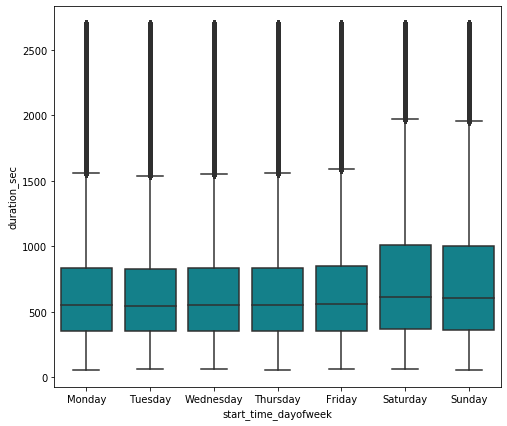

In [256]:
#Define the palette
palette = ['#00909e']
#Plot the chart
plt.figure(figsize=[8, 7]);
sb.boxplot(data = df, x = 'start_time_dayofweek', y = 'duration_sec', palette = palette);

This chart is giving me a great insight. Longer trips are on weekends. Remember the heat map? The rush hour for weekdays is bimodal, distributed between 8am and 5pm, but for weekends is more spreaded, between 11am and 5pm. This is a complementary information to confirm that weekends have longer trips probably, as a response of free time from people in the city.

#### Trips vs Month

To finish this section, let's discover the trend by month of trips:

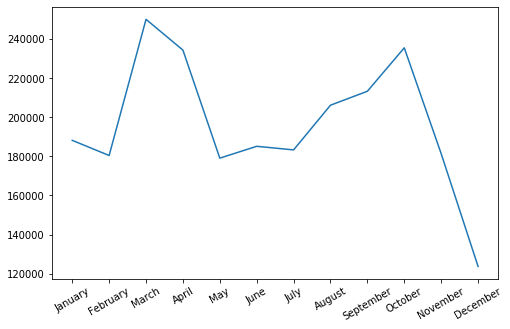

In [259]:
#Get total trips per month
df_months = df.groupby('start_time_month_name')['trips'].sum()
#Plot the chart
plt.figure(figsize=[8, 5]);
plt.plot(df_months.index, df_months);
plt.xticks(rotation=30);

This chart, reinforce the idea. People used to rest for spring and summer. In these seasons, a lot of people use to travel, leaving the city (even the country) and obviously stop working a couple of days. The same thing happens for November and December, to Thanksgiving and Christmas.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Yes, and all of them reinforce the initial idea that people use bike to get their works

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes, between Months and Trips

## Multivariate Exploration

At final check, let's see some multivariate charts.

#### Trip Duration vs Hour vs Day of Week

Probaby the 3 most importat variables I found in this exploratory analysis, I will relationate them in one chart:

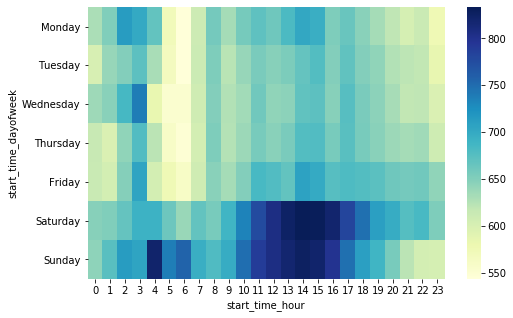

In [267]:
#Get trip duration mean by day and hour
ct_counts = df.groupby(['start_time_dayofweek', 'start_time_hour'])['duration_sec'].mean()
ct_counts = ct_counts.reset_index(name='mean')
ct_counts = ct_counts.pivot(index = 'start_time_dayofweek', columns = 'start_time_hour', values = 'mean')

#Plot the chart
plt.figure(figsize=[8, 5]);
sb.heatmap(ct_counts, cmap='YlGnBu');


I will consider this chart as the finish of my exploratory analysis, because this is finished to reinforce the idea of San Franciscans use Bay Wheels as a transportation for their works. This chart shows mean duration os trips per day per hour. The longer trips are executed on weekends, when people don't have a deadline hour to be present at the office. Also,, something really intersting appeared at 8am for weekdays, the mean duration seems to be the same as the mean duration for the entire dataset, around 670secs. This can lead to say than people tend to go to work between 8 and 9 am.

#### Trips per Stations

Let's have some insights about San Francisco Bay, which is the more popular zone to live? which is the most popular zone to work? Now, that I have discovered that people use Bay Wheels to go work between 8 and 9pm on weekdays I can have the most popular stations. The start station is related to people houses, and the end station is related to work office. Let's see:

First I will create a subset of date with data of "workforce", it means, people that use bikes to go from their homes to their offices:

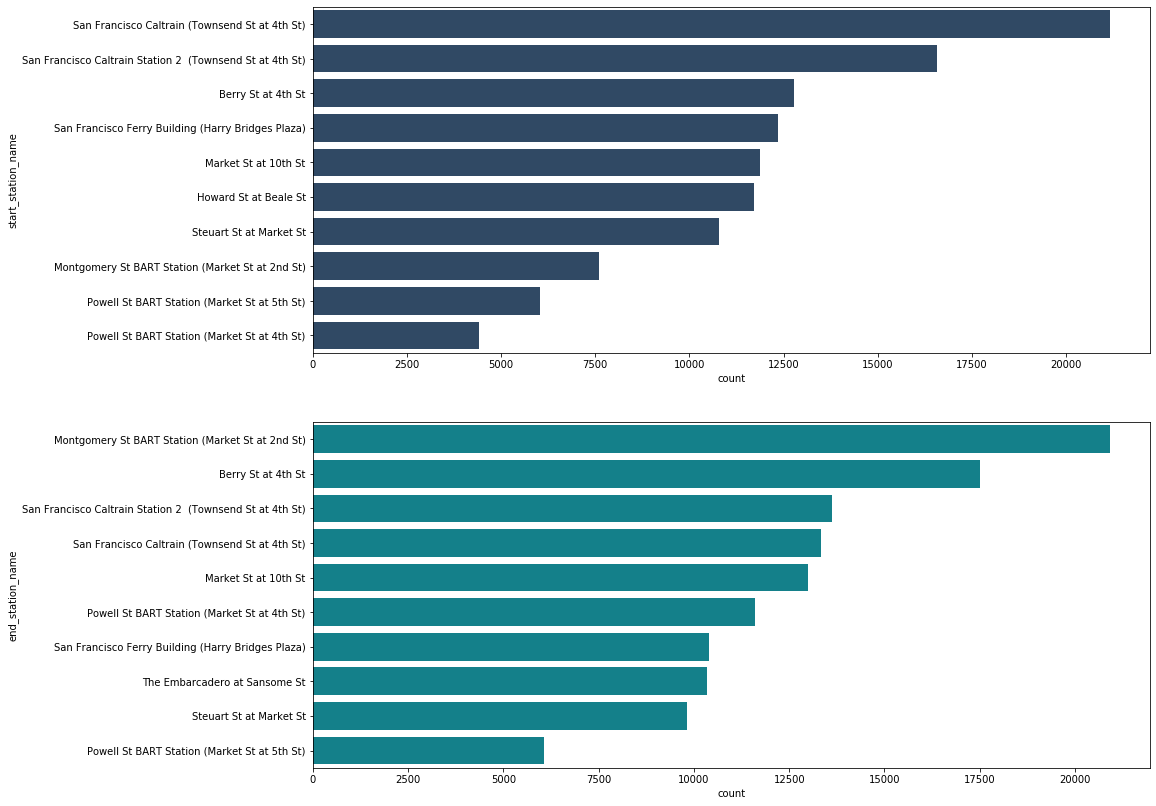

In [325]:
#Get trips from weekdays
df_workforce = df.loc[~df['start_time_dayofweek'].isin(['Saturday','Sunday'])]
#Filter trips with duration near to the mean, between 650 and 750 secs
df_workforce = df.loc[(df['duration_sec'] >= 650) & (df['duration_sec'] <= 750)]
#Filter trips started between 7 and 9 am
df_workforce = df.loc[(df['start_time_hour'] >= 7) & (df['start_time_hour'] <= 9)]
#Get top 10
df_workforce_start = df.groupby('start_station_name')['trips'].sum().nlargest(10)
df_workforce_start = df_workforce_start.reset_index(name='count')
df_workforce_start = df_workforce.loc[df['start_station_name'].isin(df_workforce_start.start_station_name)]
df_workforce_end = df.groupby('end_station_name')['trips'].sum().nlargest(10)
df_workforce_end = df_workforce_end.reset_index(name='count')
df_workforce_end = df_workforce.loc[df['end_station_name'].isin(df_workforce_end.end_station_name)]

#Plot the chart
plt.figure(figsize = [15, 14]);
#First subplot
plt.subplot(2, 1, 1)
sb.countplot(data = df_workforce_start, y = 'start_station_name', color='#27496d', order=df_workforce_start['start_station_name'].value_counts().index);
#Second subplot
plt.subplot(2, 1, 2)
sb.countplot(data = df_workforce_end, y = 'end_station_name', color='#00909e', order=df_workforce_end['end_station_name'].value_counts().index);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Number of Trips, Trip Duration, Day of Week and Hour

### Were there any interesting or surprising interactions between features?

> Have the mean of entire dataset in the 8am section of heatmap what the most surprising thing for the entire analysis for me.